A typical number of times to initialize K-means is 50-1000


Randomly initialize K-means:
    - For each 100 random initialization run K-means
    - Then compute the distortion(cost function-WCSS-Within Cluster Sum of Squares) on the set of cluster assignments and centroids at convergent.(WCSS always decreases with the increase in the number of clusters.) 
    - End with 100 ways of cluster the data
    - Pick the clustering which gave the lowest distortion


How to choose K: 
    - K-Means ++
    - Elbow method 

### Importing the libraries


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the dataset

In [2]:
df = pd.read_csv('Mall_Customers.csv')

### Review data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Genre                     200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Matrix X

In [5]:
X = df.iloc[:,[3,4]].values

### Using the elbow method to find the optimal number of clusters


In [6]:
from sklearn.cluster import KMeans

In [11]:
wcss = [] #create a vector for storing the wcss values

In [9]:
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter= 300,\
                    n_init=10, random_state=0 )
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

#### Plot the relation between WCSS and numbers of centroids 

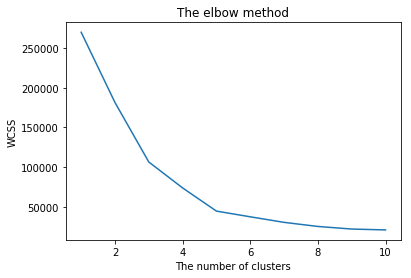

In [10]:
plt.plot(range(1,11), wcss)
plt.title('The elbow method')
plt.xlabel('The number of clusters')
plt.ylabel('WCSS')    
plt.show()

From this plot, we choose K=5.

### Applying k-means to the mall dataset


In [12]:
kmeans = KMeans(n_clusters=5, init= 'k-means++',  =300, \
                                                    n_init=10, random_state=0)

In [13]:
y_kmeans = kmeans.fit_predict(X)

### Visualising the clusters


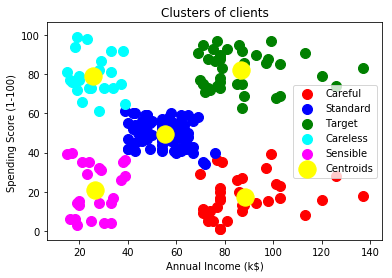

In [14]:
plt.scatter(X[y_kmeans == 0,0], X[y_kmeans == 0,1 ],\
                                        s=100, c = 'red',  label = 'Careful')
plt.scatter(X[y_kmeans == 1,0], X[y_kmeans == 1,1 ],\
                                        s=100, c = 'blue',  label = 'Standard')
plt.scatter(X[y_kmeans == 2,0], X[y_kmeans == 2,1 ],\
                                        s=100, c = 'green',  label = 'Target')
plt.scatter(X[y_kmeans == 3,0], X[y_kmeans == 3,1 ],\
                                        s=100, c = 'cyan',  label = 'Careless')
plt.scatter(X[y_kmeans == 4,0], X[y_kmeans == 4,1 ],\
                                        s=100, c = 'magenta',  label = 'Sensible')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],\
                                        s=300, c = 'yellow',  label = 'Centroids')

plt.title('Clusters of clients')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100) ')
plt.legend()
plt.show()